In [1]:
import torch
import torchvision.datasets as datasets

device = "cuda" if torch.cuda.is_available() else "cpu"
device

/usr/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c104warnERKNS_7WarningE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


'cuda'

In [2]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define data transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images 
    transforms.ToTensor(),  # Convert images to PyTorch tensors (between 0 and 1)
])

# Load CelebA dataset
celeba_dataset = datasets.CelebA(root='../../../mnt/data2/Data_Pierre2/celeba', download=False, transform=transform)

In [3]:
# Splitting the dataset
total_samples = len(celeba_dataset)
train_samples = total_samples - 10000
eval_samples = 10000
train_dataset = torch.utils.data.Subset(celeba_dataset, range(train_samples))
eval_dataset = torch.utils.data.Subset(celeba_dataset, range(train_samples, total_samples))


normalize = transforms.Normalize(mean=[0., 0., 0.], std=[1., 1., 1.])  
#transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) 

# Apply normalization to the datasets
train_dataset_normalized = [normalize(image) for image, _ in train_dataset] #list of images . values between -1 and 1 
eval_dataset_normalized = [normalize(image) for image, _ in eval_dataset]


train_dataset_reshaped = torch.stack([data.squeeze(0) for data in train_dataset_normalized]) # one big tensor with all images . values between -1 and 1
eval_dataset_reshaped = torch.stack([data.squeeze(0) for data in eval_dataset_normalized])

In [4]:
from pythae.models import VQVAE, VQVAEConfig
from pythae.trainers import BaseTrainerConfig
from pythae.pipelines.training import TrainingPipeline
from pythae.models.nn.benchmarks.celeba.resnets import Encoder_ResNet_VQVAE_CELEBA, Decoder_ResNet_VQVAE_CELEBA

In [5]:
training_config = BaseTrainerConfig(
    output_dir='my_model',
    learning_rate=2e-4,
    per_device_train_batch_size=256,
    per_device_eval_batch_size=256,
    num_epochs=20, # Change this to train the model a bit more
    steps_saving =50,
    scheduler_cls="ReduceLROnPlateau",
    scheduler_params={"patience": 10, "factor": 0.5},
    
    )



model_config = VQVAEConfig(
    latent_dim=512,
    input_dim=(3, 256, 256),
    commitment_loss_factor=0.25,
    quantization_loss_factor=1.0,
    num_embeddings=512,
    use_ema=True,
    decay=0.99 #0.99
)

model = VQVAE(
    model_config=model_config,
    encoder=Encoder_ResNet_VQVAE_CELEBA(model_config),
    decoder=Decoder_ResNet_VQVAE_CELEBA(model_config)
)


In [6]:
"""# Create you callback
import wandb
from pythae.trainers.training_callbacks import WandbCallback, TrainHistoryCallback


wandb.login()

callbacks = [] # the TrainingPipeline expects a list of callbacks
wandb_cb =TrainHistoryCallback() # Build the callback 
# SetUp the callback 
wandb_cb.setup(
training_config=training_config, # training config
model_config=model_config, # model config
project_name="vq-vae_experiment", # specify your wandb project
# specify your wandb entity
)
callbacks.append(wandb_cb) # Add it to the callbacks list"""

'# Create you callback\nimport wandb\nfrom pythae.trainers.training_callbacks import WandbCallback, TrainHistoryCallback\n\n\nwandb.login()\n\ncallbacks = [] # the TrainingPipeline expects a list of callbacks\nwandb_cb =TrainHistoryCallback() # Build the callback \n# SetUp the callback \nwandb_cb.setup(\ntraining_config=training_config, # training config\nmodel_config=model_config, # model config\nproject_name="vq-vae_experiment", # specify your wandb project\n# specify your wandb entity\n)\ncallbacks.append(wandb_cb) # Add it to the callbacks list'

In [7]:
pipeline = TrainingPipeline(
    training_config=training_config,
    model=model,
   
)

In [8]:
pipeline(
    train_data=train_dataset_reshaped,
    eval_data=eval_dataset_reshaped,
    
)

Preprocessing train data...
Checking train dataset...
Preprocessing eval data...

Checking eval dataset...
Using Base Trainer

Model passed sanity check !
Ready for training.

Created my_model/VQVAE_training_2024-01-16_13-29-10. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 20
 - per_device_train_batch_size: 256
 - per_device_eval_batch_size: 256
 - checkpoint saving every: 50
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
Scheduler: <torch.optim.lr_scheduler.ReduceLROnPlateau object at 0x7f3471b245d0>

Successfully launched training !



Training of epoch 1/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 1/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5517.1749
Eval loss: 2755.6017
--------------------------------------------------------------------------


Training of epoch 2/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 2/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 2664.6489
Eval loss: 2513.9045
--------------------------------------------------------------------------


Training of epoch 3/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 3/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 2142.7781
Eval loss: 1795.1782
--------------------------------------------------------------------------


Training of epoch 4/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 4/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1560.8401
Eval loss: 1420.1019
--------------------------------------------------------------------------


Training of epoch 5/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 5/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1319.4551
Eval loss: 1222.5617
--------------------------------------------------------------------------


Training of epoch 6/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 6/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1170.96
Eval loss: 1108.175
--------------------------------------------------------------------------


Training of epoch 7/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 7/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1081.3122
Eval loss: 1048.9172
--------------------------------------------------------------------------


Training of epoch 8/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 8/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1040.0158
Eval loss: 1030.9798
--------------------------------------------------------------------------


Training of epoch 9/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 9/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1020.3616
Eval loss: 1013.1387
--------------------------------------------------------------------------


Training of epoch 10/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 10/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1044.5046
Eval loss: 1039.736
--------------------------------------------------------------------------


Training of epoch 11/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 11/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1058.86
Eval loss: 1066.8957
--------------------------------------------------------------------------


Training of epoch 12/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 12/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1080.9927
Eval loss: 1093.1878
--------------------------------------------------------------------------


Training of epoch 13/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 13/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1113.416
Eval loss: 1134.2624
--------------------------------------------------------------------------


Training of epoch 14/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 14/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1140.1821
Eval loss: 1129.9891
--------------------------------------------------------------------------


Training of epoch 15/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 15/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1145.7236
Eval loss: 1145.6208
--------------------------------------------------------------------------


Training of epoch 16/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 16/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5580.8399
Eval loss: 17394.5234
--------------------------------------------------------------------------


Training of epoch 17/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 17/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 9228.2052
Eval loss: 1527.4208
--------------------------------------------------------------------------


Training of epoch 18/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 18/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1542.161
Eval loss: 1455.951
--------------------------------------------------------------------------


Training of epoch 19/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 19/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1391.3021
Eval loss: 1334.8191
--------------------------------------------------------------------------


Training of epoch 20/20:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 20/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1311.9524
Eval loss: 1296.5762
--------------------------------------------------------------------------
Training ended!
Saved final model in my_model/VQVAE_training_2024-01-16_13-29-10/final_model


In [9]:
import os
from pythae.models import AutoModel

In [10]:
last_training = sorted(os.listdir('my_model'))[-1]
#trained_model = AutoModel.load_from_folder(os.path.join('my_model', last_training, 'checkpoint_epoch_15')).to(device)
trained_model = AutoModel.load_from_folder(os.path.join('my_model', last_training, 'final_model')).to(device)

## Visualizing reconstructions

In [11]:
reconstructions = trained_model.reconstruct((eval_dataset_reshaped[:25]).to(device)).detach().cpu()

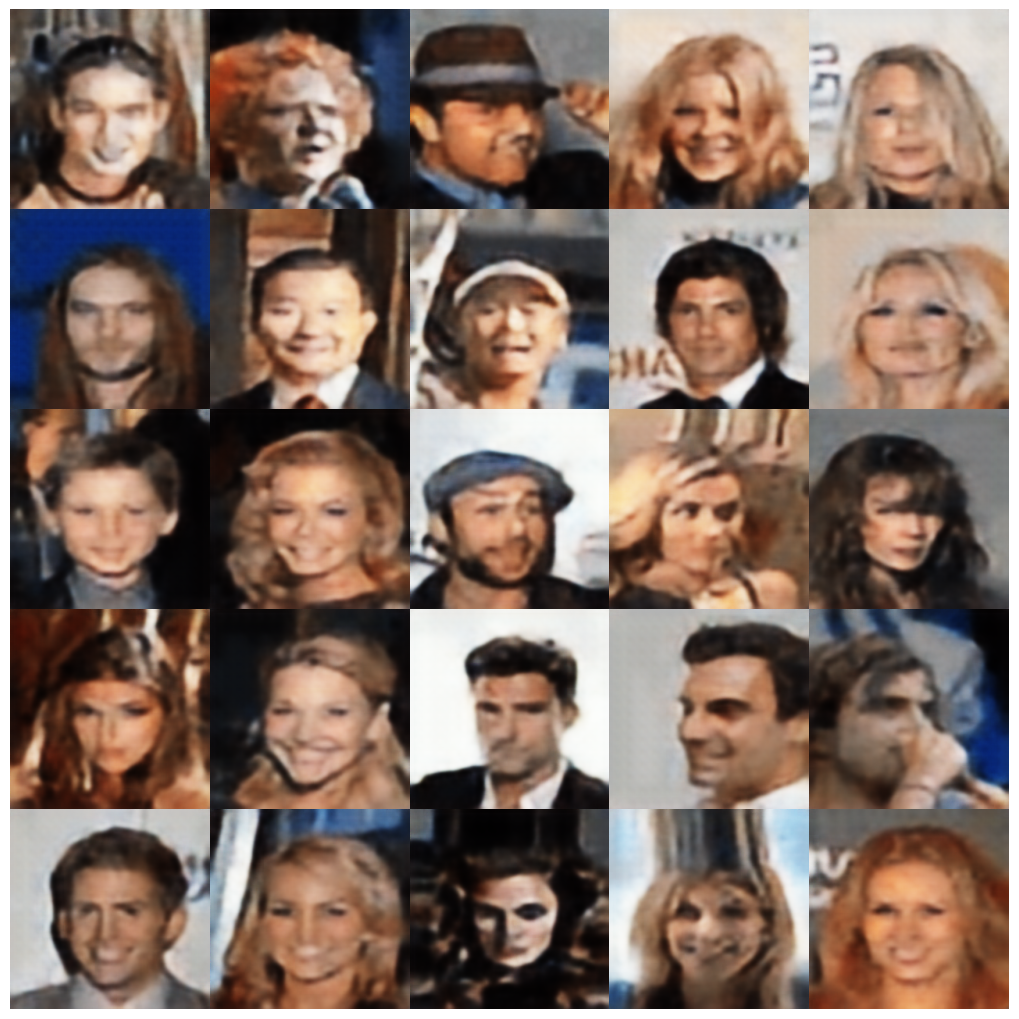

In [12]:
import matplotlib.pyplot as plt

# Assuming reconstructions is a list/tensor of RGB images of shape (N, C, H, W)
# N: Number of images, C: Number of channels, H: Height, W: Width

# show reconstructions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        # Assuming reconstructions is a list/tensor of RGB images
        axes[i][j].imshow( reconstructions[i * 5 + j].cpu().permute(1, 2, 0))  # Permute channels for Matplotlib (assuming tensor)
        axes[i][j].axis('off')
        
plt.tight_layout(pad=0.)
plt.show()


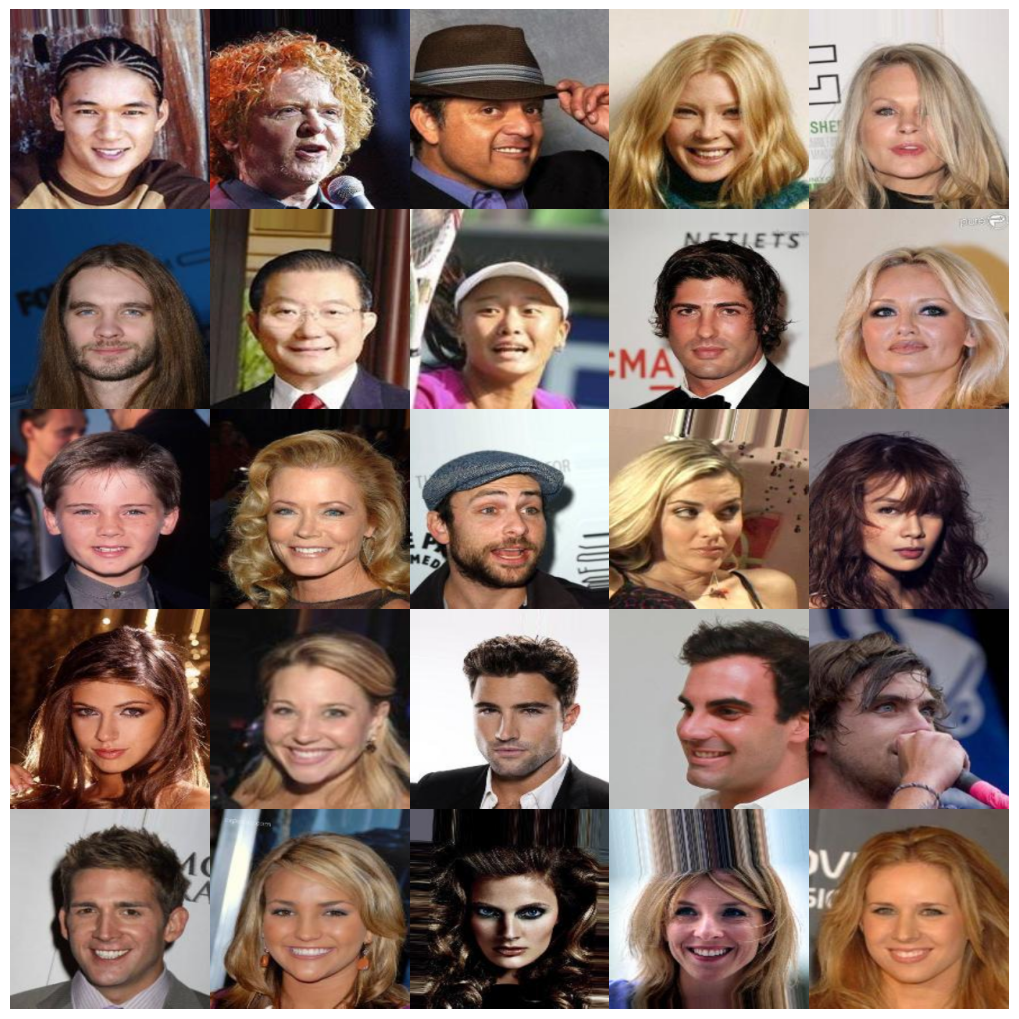

In [13]:
# show the true data
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(eval_dataset[i*5 +j][0].cpu().permute(1,2,0))
        axes[i][j].axis('off')
        
plt.tight_layout(pad=0.)

## Visualizing interpolations


In [14]:
interpolations = trained_model.interpolate(eval_dataset_reshaped[:5].to(device), eval_dataset_reshaped[5:10].to(device), granularity=10).detach().cpu()

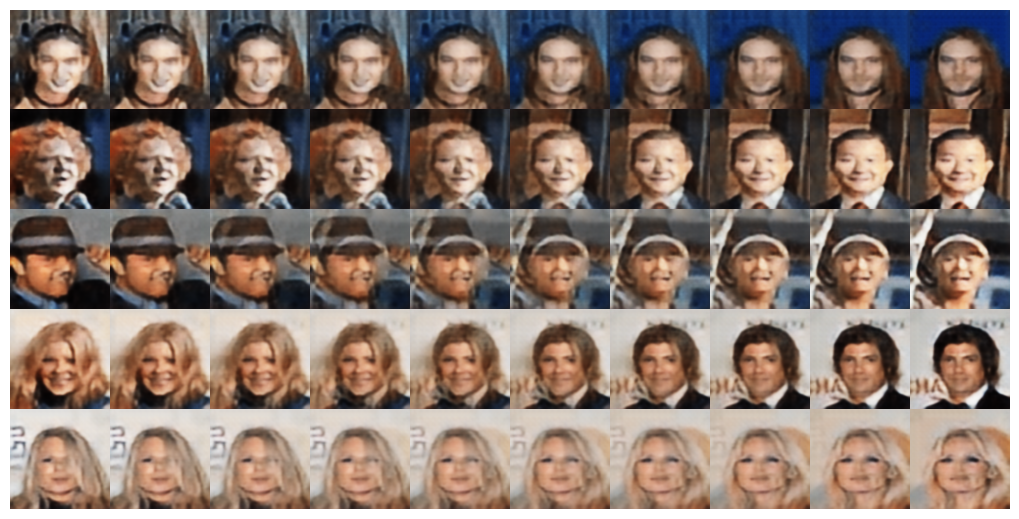

In [15]:
# show interpolations
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(10, 5))

for i in range(5):
    for j in range(10):
        axes[i][j].imshow(interpolations[i, j].cpu().permute(1,2,0))
        axes[i][j].axis('off')
        
plt.tight_layout(pad=0.)

In [16]:
eval_dataset_reshaped[:1].to(device).shape

torch.Size([1, 3, 256, 256])

In [17]:
trained_model.embed(eval_dataset_reshaped[:1].to(device)).shape

torch.Size([1, 512, 16, 16])

## Sample

In [18]:
from pythae.models import AutoModel
from pythae.samplers import NormalSampler, GaussianMixtureSampler,PixelCNNSampler, PixelCNNSamplerConfig


my_sampler_config = PixelCNNSamplerConfig(input_dim= 256  )

# Define your sampler
my_sampler = PixelCNNSampler(sampler_config = my_sampler_config, model=trained_model)
my_sampler.fit(eval_dataset_reshaped)

#my_sampler = NormalSampler(model=trained_model )



! No eval dataset provided ! -> keeping best model on train.

Model passed sanity check !
Ready for training.

Created dummy_output_dir/PixelCNN_training_2024-01-16_15-54-37. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 100
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
Scheduler: None

Successfully launched training !



Training of epoch 1/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 6.1179
--------------------------------------------------------------------------


Training of epoch 2/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.8541
--------------------------------------------------------------------------


Training of epoch 3/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.6826
--------------------------------------------------------------------------


Training of epoch 4/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.5701
--------------------------------------------------------------------------


Training of epoch 5/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.4935
--------------------------------------------------------------------------


Training of epoch 6/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.4333
--------------------------------------------------------------------------


Training of epoch 7/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.3832
--------------------------------------------------------------------------


Training of epoch 8/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.3396
--------------------------------------------------------------------------


Training of epoch 9/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.3015
--------------------------------------------------------------------------


Training of epoch 10/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.2644
--------------------------------------------------------------------------


Training of epoch 11/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.2358
--------------------------------------------------------------------------


Training of epoch 12/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.2065
--------------------------------------------------------------------------


Training of epoch 13/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.1762
--------------------------------------------------------------------------


Training of epoch 14/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.1513
--------------------------------------------------------------------------


Training of epoch 15/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.129
--------------------------------------------------------------------------


Training of epoch 16/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.1042
--------------------------------------------------------------------------


Training of epoch 17/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.0822
--------------------------------------------------------------------------


Training of epoch 18/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.0595
--------------------------------------------------------------------------


Training of epoch 19/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.0396
--------------------------------------------------------------------------


Training of epoch 20/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 5.0202
--------------------------------------------------------------------------


Training of epoch 21/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.9979
--------------------------------------------------------------------------


Training of epoch 22/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.9795
--------------------------------------------------------------------------


Training of epoch 23/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.9619
--------------------------------------------------------------------------


Training of epoch 24/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.9499
--------------------------------------------------------------------------


Training of epoch 25/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.9323
--------------------------------------------------------------------------


Training of epoch 26/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.9192
--------------------------------------------------------------------------


Training of epoch 27/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.9039
--------------------------------------------------------------------------


Training of epoch 28/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.8888
--------------------------------------------------------------------------


Training of epoch 29/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.8743
--------------------------------------------------------------------------


Training of epoch 30/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.8647
--------------------------------------------------------------------------


Training of epoch 31/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.8493
--------------------------------------------------------------------------


Training of epoch 32/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.8382
--------------------------------------------------------------------------


Training of epoch 33/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.8304
--------------------------------------------------------------------------


Training of epoch 34/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.8145
--------------------------------------------------------------------------


Training of epoch 35/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.8075
--------------------------------------------------------------------------


Training of epoch 36/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.7911
--------------------------------------------------------------------------


Training of epoch 37/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.7813
--------------------------------------------------------------------------


Training of epoch 38/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.7745
--------------------------------------------------------------------------


Training of epoch 39/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.7619
--------------------------------------------------------------------------


Training of epoch 40/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.7531
--------------------------------------------------------------------------


Training of epoch 41/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.7458
--------------------------------------------------------------------------


Training of epoch 42/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.7332
--------------------------------------------------------------------------


Training of epoch 43/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.7265
--------------------------------------------------------------------------


Training of epoch 44/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.7173
--------------------------------------------------------------------------


Training of epoch 45/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.7076
--------------------------------------------------------------------------


Training of epoch 46/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.7048
--------------------------------------------------------------------------


Training of epoch 47/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.693
--------------------------------------------------------------------------


Training of epoch 48/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.6887
--------------------------------------------------------------------------


Training of epoch 49/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.6785
--------------------------------------------------------------------------


Training of epoch 50/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.6714
--------------------------------------------------------------------------


Training of epoch 51/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.6626
--------------------------------------------------------------------------


Training of epoch 52/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.6566
--------------------------------------------------------------------------


Training of epoch 53/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.6489
--------------------------------------------------------------------------


Training of epoch 54/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.6397
--------------------------------------------------------------------------


Training of epoch 55/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.6378
--------------------------------------------------------------------------


Training of epoch 56/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.6294
--------------------------------------------------------------------------


Training of epoch 57/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.6248
--------------------------------------------------------------------------


Training of epoch 58/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.6176
--------------------------------------------------------------------------


Training of epoch 59/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.6123
--------------------------------------------------------------------------


Training of epoch 60/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.6095
--------------------------------------------------------------------------


Training of epoch 61/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.6022
--------------------------------------------------------------------------


Training of epoch 62/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5942
--------------------------------------------------------------------------


Training of epoch 63/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5887
--------------------------------------------------------------------------


Training of epoch 64/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5879
--------------------------------------------------------------------------


Training of epoch 65/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5819
--------------------------------------------------------------------------


Training of epoch 66/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.577
--------------------------------------------------------------------------


Training of epoch 67/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5746
--------------------------------------------------------------------------


Training of epoch 68/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5678
--------------------------------------------------------------------------


Training of epoch 69/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5589
--------------------------------------------------------------------------


Training of epoch 70/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.56
--------------------------------------------------------------------------


Training of epoch 71/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5535
--------------------------------------------------------------------------


Training of epoch 72/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5511
--------------------------------------------------------------------------


Training of epoch 73/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5389
--------------------------------------------------------------------------


Training of epoch 74/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5403
--------------------------------------------------------------------------


Training of epoch 75/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5393
--------------------------------------------------------------------------


Training of epoch 76/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5301
--------------------------------------------------------------------------


Training of epoch 77/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5281
--------------------------------------------------------------------------


Training of epoch 78/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5237
--------------------------------------------------------------------------


Training of epoch 79/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5166
--------------------------------------------------------------------------


Training of epoch 80/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5138
--------------------------------------------------------------------------


Training of epoch 81/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5103
--------------------------------------------------------------------------


Training of epoch 82/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5058
--------------------------------------------------------------------------


Training of epoch 83/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5035
--------------------------------------------------------------------------


Training of epoch 84/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.502
--------------------------------------------------------------------------


Training of epoch 85/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.5029
--------------------------------------------------------------------------


Training of epoch 86/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.4924
--------------------------------------------------------------------------


Training of epoch 87/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.4915
--------------------------------------------------------------------------


Training of epoch 88/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.4884
--------------------------------------------------------------------------


Training of epoch 89/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.4919
--------------------------------------------------------------------------


Training of epoch 90/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.4835
--------------------------------------------------------------------------


Training of epoch 91/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.4778
--------------------------------------------------------------------------


Training of epoch 92/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.4785
--------------------------------------------------------------------------


Training of epoch 93/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.4832
--------------------------------------------------------------------------


Training of epoch 94/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.4696
--------------------------------------------------------------------------


Training of epoch 95/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.4678
--------------------------------------------------------------------------


Training of epoch 96/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.4652
--------------------------------------------------------------------------


Training of epoch 97/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.4626
--------------------------------------------------------------------------


Training of epoch 98/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.4601
--------------------------------------------------------------------------


Training of epoch 99/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.4565
--------------------------------------------------------------------------


Training of epoch 100/100:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4.4551
--------------------------------------------------------------------------
Training ended!
Saved final model in dummy_output_dir/PixelCNN_training_2024-01-16_15-54-37/final_model


In [19]:
# Generate samples
gen_data = my_sampler.sample(
num_samples=10,
batch_size=10,
output_dir="./",
return_gen=False
)

TypeError: 'Tensor' object is not callable